<h1 align=center><font size = 8>Situación Covid-19 en Galicia</font></h1>

El propósito de este notebook es capturar de la <a href="https://coronavirus.sergas.gal/datos/#/gl-ES/undefined">web del Sergas</a> los datos actualizados de la situación de Galicia frente al Covid-19, y posteriormente realizar algunos análisis básicos, guardando los resultados en directorios.

Para los cálculos basados en el número de habitantes se emplea un fichero csv obteniendo mediante otro notebook, llamado _Población Areas_ y también disponible en el repositorio de GitHub. Se debe de tener en cuenta que en este análisis se trabaja con áreas sanitarias y no con ayuntamientos. Pese a que todos los nombres de las áreas sanitarias coinciden también con nombres de ayuntamientos, en ellas se encuentran englobadas otras comarcas y ayuntamientos limítrofes y próximas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
import sys
import requests
import datetime
import os

# 1. Importación de datos

## 1.1. Población por área sanitaria

Para futuros cálculos, es necesario contar con la población de las áreas sanitarias. El fichero csv empleado ha sido anteriormente obtenido en el notebook _Poblacion Areas_ 

In [2]:
df_areas = pd.read_csv('poblacion.csv')
df_areas

,Area sanitaria,Habitantes
0,A Coruña,550024
1,Ferrol,192136
2,Lugo,333631
3,Ourense,311674
4,Pontevedra,307877
5,Santiago,448118
6,Vigo,564814


## 1.2. Datos Covid-19 actuales

El Sergas tiene disponible una página web con estadísticas del Covid-19 en Galicia, con los siguientes ficheros de información:
<ul>
    <li>ActivosCuradosFallecidos</li>
    <li>CifrasTotais</li>
    <li>Fallecidos</li>
    <li>InfectadosPorFecha</li>
    <li>OcupacionCamasHospital</li>
    <li>PorcentajeInfeccionesPorFecha</li>
    <li>PorcentajeInfectadosPorGenero</li>
</ul>

Antes de proceder con la lectura de los datos, comprobaremos cuál es la última versión y preparemos el repositorio para guardar las gráficas:

In [3]:
#Ruta de la web donde están los ficheros
path = 'https://coronavirus.sergas.gal/infodatos/'
#Fichero con el que vamos a realizar la prueba para obtener la fecha
file = '_COVID19_Web_CifrasTotais.csv'

#Obtiene el día 'datefile' más reciente en los ficheros
for i in range(0,10):
    datefile = (date.today() - timedelta(days=i)).strftime("%Y-%m-%d")
    filepath = path+datefile+file
    response = requests.head(filepath)
    if response.status_code == requests.codes.ok:
        print('Ultima actualización: '+datefile)
        break;
    elif i == 9:
        print('Algo ha ido mal. La web lleva muchos días sin actualizarse o ha cambiado su estructura')
    
#Para simplificar la nomenclatura de las áreas
dict_areas={'A.S. A CORUÑA E CEE':'A Coruña',
            'A.S. FERROL':'Ferrol',
            'A.S. LUGO, A MARIÑA E MONFORTE':'Lugo',
            'A.S. OURENSE, VERÍN E O BARCO':'Ourense',
            'A.S. PONTEVEDRA E O SALNÉS':'Pontevedra',
            'A.S. SANTIAGO E BARBANZA':'Santiago',
            'A.S. VIGO':'Vigo'
           }

savepath = datefile
try:
    os.mkdir(savepath)
except OSError:
    print('No se ha podido crear el directorio')
else:
    print('El directorio ya existe')
os.chdir(savepath)

Ultima actualización: 2020-10-17
El directorio ya existe


### 1.2.1. ActivosCuradosFallecidos

In [4]:
#Nombre del archivo
file = '_COVID19_Web_ActivosCuradosFallecidos.csv'

#Leemos el fichero
df_acf = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_acf['Area_Sanitaria'] = df_acf['Area_Sanitaria'].replace(dict_areas)
df_acf['Fecha'] = pd.to_datetime(df_acf['Fecha'])
#df_acf = df_acf[df_acf['Area_Sanitaria'] != 'GALICIA']

df_acf.tail()

,Fecha,Area_Sanitaria,Pacientes_Sin_Alta,Pacientes_Con_Alta,Exitus
1843,2020-10-17,Ourense,1577,3551,190
1844,2020-10-17,Pontevedra,457,2131,25
1845,2020-10-17,Santiago,719,3791,123
1846,2020-10-17,Vigo,708,3360,139
1847,2020-10-17,GALICIA,4932,23326,818


### 1.2.2. CifrasTotais

In [5]:
#Nombre del archivo
file = '_COVID19_Web_CifrasTotais.csv'

#Leemos el fichero
df_cift = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_cift['Fecha'] = [(d[0]) for d in df_cift['Fecha'].str.split(' ')]
df_cift['Fecha'] = pd.to_datetime(df_cift['Fecha'])
df_cift['Area_Sanitaria'] = df_cift['Area_Sanitaria'].replace(dict_areas)
df_cift = df_cift[df_cift['Area_Sanitaria'] != 'GALICIA']

df_cift

,Fecha,Area_Sanitaria,Casos_Totais,Casos_Confirmados_PCR_Ultimas24h,Pacientes_Sin_Alta,Pacientes_Con_Alta,Camas_Ocupadas_HOS,Camas_Ocupadas_UCI,Probas_Realizadas_PCR,Probas_Realizadas_Non_PCR,Exitus
0,2020-10-17,A Coruña,7458,66,839,6405,48,6,139554,64667,214
1,2020-10-17,Ferrol,1279,20,182,1062,5,0,39875,25639,35
2,2020-10-17,Lugo,3568,41,450,3026,18,3,68343,64347,92
3,2020-10-17,Ourense,5318,78,1577,3552,98,13,79309,61552,190
4,2020-10-17,Pontevedra,2613,54,457,2130,17,4,54079,36238,25
5,2020-10-17,Santiago,4633,77,719,3791,33,8,92409,78530,123
6,2020-10-17,Vigo,4207,101,708,3360,27,9,112913,49515,139


### 1.2.3. Fallecidos

In [6]:
#Nombre del archivo
file = '_COVID19_Web_Fallecidos.csv'

#Leemos el fichero
df_rip = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_rip['Area_Sanitaria'] = df_rip['Area_Sanitaria'].replace(dict_areas)
# df_rip = df_rip[df_rip['Area_Sanitaria'] != 'GALICIA']

df_rip.head()

,Area_Sanitaria,Grupo_Edad,Fallecidos,Porcentaje
0,GALICIA,0-9,0,0%
1,GALICIA,10-19,0,0%
2,GALICIA,20-29,0,0%
3,GALICIA,30-39,2,"0,24%"
4,GALICIA,40-49,2,"0,24%"


### 1.2.4. Infectados

In [7]:
#Nombre del archivo
file = '_COVID19_Web_InfectadosPorFecha.csv'

#Leemos el fichero
df_inf = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_inf['Area_Sanitaria'] = df_inf['Area_Sanitaria'].replace(dict_areas)
df_inf['Fecha'] = pd.to_datetime(df_inf['Fecha'])
# df_inf = df_inf[df_inf['Area_Sanitaria'] != 'GALICIA']

df_inf.tail()

,Fecha,Area_Sanitaria,Personas_Infectadas
1370,2020-10-17,Ourense,46
1371,2020-10-17,Pontevedra,42
1372,2020-10-17,Santiago,61
1373,2020-10-17,Vigo,84
1374,2020-10-17,GALICIA,325


### 1.2.5. OcupacionCamas

In [8]:
#Nombre del archivo
file = '_COVID19_Web_OcupacionCamasHospital.csv'

#Leemos el fichero
df_cama = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_cama['Fecha'] = [(d[0]) for d in df_cama['Fecha'].str.split(' ')]
df_cama['Fecha'] = pd.to_datetime(df_cama['Fecha'])
df_cama['Area_Sanitaria'] = df_cama['Area_Sanitaria'].replace(dict_areas)
df_cama = df_cama[df_cama['Area_Sanitaria'] != 'GALICIA']

df_cama.head()

,Fecha,Area_Sanitaria,Hospital,Tipo_Hospital,Camas_Ocupadas_HOS,Camas_Ocupadas_UC
0,2020-10-17,A Coruña,CENTRO ONCOLOXICO DE GALICIA,PRIVADO,0,0
1,2020-10-17,A Coruña,C.H.U. A CORUÑA,PÚBLICO,45,5
2,2020-10-17,A Coruña,HM MODELO-BELEN,PRIVADO,1,1
3,2020-10-17,A Coruña,HOSPITAL QUIRONSALUD A CORUÑA,PRIVADO,1,0
4,2020-10-17,A Coruña,HOSPITAL SAN RAFAEL,PRIVADO,0,0


### 1.2.6. PorcentajeInfeccionesPorFecha

In [9]:
#Nombre del archivo
file = '_COVID19_Web_PorcentajeInfeccionesPorFecha.csv'

#Leemos el fichero
df_per_inf = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_per_inf['Area_Sanitaria'] = df_per_inf['Area_Sanitaria'].replace(dict_areas)
df_per_inf['Fecha'] = pd.to_datetime(df_per_inf['Fecha'])
df_per_inf['Porcentaje_Infecciones'] = [float(p[0].replace(',','.')) for p in df_per_inf['Porcentaje_Infecciones'].str.split('%')]

df_per_inf.tail()

,Fecha,Area_Sanitaria,Casos_Abiertos,Pruebas_PCR_Realizadas,Porcentaje_Infecciones
1863,2020-10-17,Ourense,46,601,7.65
1864,2020-10-17,Pontevedra,42,332,12.65
1865,2020-10-17,Santiago,61,776,7.86
1866,2020-10-17,Vigo,84,1301,6.46
1867,2020-10-17,GALICIA,325,4456,7.29


### 1.2.7. PorcentajeInfectadosGenero

In [10]:
#Nombre del archivo
file = '_COVID19_Web_PorcentajeInfectadosPorGenero.csv'

#Leemos el fichero
df_sex = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_sex['Area_Sanitaria'] = df_sex['Area_Sanitaria'].replace(dict_areas)
# df_cama = df_cama[df_cama['Area_Sanitaria'] != 'GALICIA']

df_sex.head()

,Area_Sanitaria,Genero,Personas_Infectadas,Porcentaje
0,GALICIA,HOMES,11996,"45,72%"
1,GALICIA,MULLERES,14241,"54,28%"
2,A Coruña,HOMES,3133,"46,15%"
3,A Coruña,MULLERES,3655,"53,85%"
4,Ferrol,HOMES,498,"44,42%"


# 2. Dataframe por área sanitaria

Para simplicar las tareas de análisis, a partir de todos datos anteriores crearemos un dataframe por cada una de las áreas santiarias, además de uno general para toda Galicia, incluyendo la siguiente información:
<ul>
    <li>Fecha</li>
    <li>Positivos (detectados en la fecha concreta)</li>
    <li>PCR (realizadas en ese día)</li>
    <li>%Infecciones (porcentaje de PCR positivas = positivos /número de PCR realizadas)</li>
    <li>Positivos 7 (casos positivos acumulados en los últimos 7 días)</li>
    <li>Positivos 14 (casos positivos acumulados en los últimos 14 días)</li>
    <li>%Inf 7 (porcentaje de PCR positivas en los últimos 7 días)</li>
    <li>%Inf 14 (porcentaje de PCR positivas en los últimos 14 días)</li>
</ul>

In [11]:
#Simplificamos los nombres de df_per_inf
df_per_inf.rename(columns={'Area_Sanitaria':'Area',
                           'Casos_Abiertos':'Positivos',
                           'Pruebas_PCR_Realizadas':'PCR',
                           'Porcentaje_Infecciones':'%Infecciones'},
                  inplace=True)
df_per_inf.head()

,Fecha,Area,Positivos,PCR,%Infecciones
0,2020-02-14,Pontevedra,0,1,0.0
1,2020-02-14,GALICIA,0,1,0.0
2,2020-02-17,Vigo,0,2,0.0
3,2020-02-17,GALICIA,0,2,0.0
4,2020-02-21,Vigo,0,4,0.0


In [12]:
#Dataframe con los datos de infecciones en A Coruña
df_coruna = df_per_inf[['Fecha','Positivos','PCR','%Infecciones']][df_per_inf['Area']=='A Coruña']
df_coruna.reset_index(inplace=True, drop=True)
acu7 = df_coruna['Positivos'].cumsum()
acu14 = acu7.copy()
pcr7 = 100*(df_coruna['Positivos'].cumsum() / df_coruna['PCR'].cumsum())
pcr14 = pcr7.copy()
for i in range(7,len(acu7)+1):
    acu7[i-1] = df_coruna['Positivos'].iloc[i-7:i].sum()
    pcr7[i-1] = 100*(df_coruna['Positivos'].iloc[i-7:i].sum() / df_coruna['PCR'].iloc[i-7:i].sum())
for i in range(14,len(acu14)+1):
    acu14[i-1] = df_coruna['Positivos'].iloc[i-14:i].sum()
    pcr14[i-1] = 100*(df_coruna['Positivos'].iloc[i-14:i].sum() / df_coruna['PCR'].iloc[i-14:i].sum())
df_coruna['Positivos_7'] = acu7
df_coruna['Positivos_14'] = acu14
df_coruna['%Inf_7'] = pcr7
df_coruna['%Inf_14'] = pcr14
df_coruna.tail()

,Fecha,Positivos,PCR,%Infecciones,Positivos_7,Positivos_14,%Inf_7,%Inf_14
231,2020-10-13,47,501,9.38,293,528,4.793848,3.548149
232,2020-10-14,37,1226,3.02,290,531,4.710086,3.673215
233,2020-10-15,68,1354,5.02,320,573,4.841150,3.954997
234,2020-10-16,69,1558,4.43,356,603,5.051795,4.188954
235,2020-10-17,38,783,4.85,339,601,5.034903,4.409391


In [13]:
#Dataframe con los datos de infecciones en Ferrol
df_ferrol = df_per_inf[['Fecha','Positivos','PCR','%Infecciones']][df_per_inf['Area']=='Ferrol']
df_ferrol.reset_index(inplace=True, drop=True)
acu7 = df_ferrol['Positivos'].cumsum()
acu14 = acu7.copy()
pcr7 = 100*(df_ferrol['Positivos'].cumsum() / df_ferrol['PCR'].cumsum())
pcr14 = pcr7.copy()
for i in range(7,len(acu7)+1):
    acu7[i-1] = df_ferrol['Positivos'].iloc[i-7:i].sum()
    pcr7[i-1] = 100*(df_ferrol['Positivos'].iloc[i-7:i].sum() / df_ferrol['PCR'].iloc[i-7:i].sum())
for i in range(14,len(acu14)+1):
    acu14[i-1] = df_ferrol['Positivos'].iloc[i-14:i].sum()
    pcr14[i-1] = 100*(df_ferrol['Positivos'].iloc[i-14:i].sum() / df_ferrol['PCR'].iloc[i-14:i].sum())
df_ferrol['Positivos_7'] = acu7
df_ferrol['Positivos_14'] = acu14
df_ferrol['%Inf_7'] = pcr7
df_ferrol['%Inf_14'] = pcr14

#Dataframe con los datos de infecciones en Lugo
df_lugo = df_per_inf[['Fecha','Positivos','PCR','%Infecciones']][df_per_inf['Area']=='Lugo']
df_lugo.reset_index(inplace=True, drop=True)
acu7 = df_lugo['Positivos'].cumsum()
acu14 = acu7.copy()
pcr7 = 100*(df_lugo['Positivos'].cumsum() / df_lugo['PCR'].cumsum())
pcr14 = pcr7.copy()
for i in range(7,len(acu7)+1):
    acu7[i-1] = df_lugo['Positivos'].iloc[i-7:i].sum()
    pcr7[i-1] = 100*(df_lugo['Positivos'].iloc[i-7:i].sum() / df_lugo['PCR'].iloc[i-7:i].sum())
for i in range(14,len(acu14)+1):
    acu14[i-1] = df_lugo['Positivos'].iloc[i-14:i].sum()
    pcr14[i-1] = 100*(df_lugo['Positivos'].iloc[i-14:i].sum() / df_lugo['PCR'].iloc[i-14:i].sum())
df_lugo['Positivos_7'] = acu7
df_lugo['Positivos_14'] = acu14
df_lugo['%Inf_7'] = pcr7
df_lugo['%Inf_14'] = pcr14


#Dataframe con los datos de infecciones en Ourense
df_ourense = df_per_inf[['Fecha','Positivos','PCR','%Infecciones']][df_per_inf['Area']=='Ourense']
df_ourense.reset_index(inplace=True, drop=True)
acu7 = df_ourense['Positivos'].cumsum()
acu14 = acu7.copy()
pcr7 = 100*(df_ourense['Positivos'].cumsum() / df_ourense['PCR'].cumsum())
pcr14 = pcr7.copy()
for i in range(7,len(acu7)+1):
    acu7[i-1] = df_ourense['Positivos'].iloc[i-7:i].sum()
    pcr7[i-1] = 100*(df_ourense['Positivos'].iloc[i-7:i].sum() / df_ourense['PCR'].iloc[i-7:i].sum())
for i in range(14,len(acu14)+1):
    acu14[i-1] = df_ourense['Positivos'].iloc[i-14:i].sum()
    pcr14[i-1] = 100*(df_ourense['Positivos'].iloc[i-14:i].sum() / df_ourense['PCR'].iloc[i-14:i].sum())
df_ourense['Positivos_7'] = acu7
df_ourense['Positivos_14'] = acu14
df_ourense['%Inf_7'] = pcr7
df_ourense['%Inf_14'] = pcr14


#Dataframe con los datos de infecciones en Pontevedra
df_pontevedra = df_per_inf[['Fecha','Positivos','PCR','%Infecciones']][df_per_inf['Area']=='Pontevedra']
df_pontevedra.reset_index(inplace=True, drop=True)
acu7 = df_pontevedra['Positivos'].cumsum()
acu14 = acu7.copy()
pcr7 = 100*(df_pontevedra['Positivos'].cumsum() / df_pontevedra['PCR'].cumsum())
pcr14 = pcr7.copy()
for i in range(7,len(acu7)+1):
    acu7[i-1] = df_pontevedra['Positivos'].iloc[i-7:i].sum()
    pcr7[i-1] = 100*(df_pontevedra['Positivos'].iloc[i-7:i].sum() / df_pontevedra['PCR'].iloc[i-7:i].sum())
for i in range(14,len(acu14)+1):
    acu14[i-1] = df_pontevedra['Positivos'].iloc[i-14:i].sum()
    pcr14[i-1] = 100*(df_pontevedra['Positivos'].iloc[i-14:i].sum() / df_pontevedra['PCR'].iloc[i-14:i].sum())
df_pontevedra['Positivos_7'] = acu7
df_pontevedra['Positivos_14'] = acu14
df_pontevedra['%Inf_7'] = pcr7
df_pontevedra['%Inf_14'] = pcr14

#Dataframe con los datos de infecciones en Santiago
df_santiago = df_per_inf[['Fecha','Positivos','PCR','%Infecciones']][df_per_inf['Area']=='Santiago']
df_santiago.reset_index(inplace=True, drop=True)
acu7 = df_santiago['Positivos'].cumsum()
acu14 = acu7.copy()
pcr7 = 100*(df_santiago['Positivos'].cumsum() / df_santiago['PCR'].cumsum())
pcr14 = pcr7.copy()
for i in range(7,len(acu7)+1):
    acu7[i-1] = df_santiago['Positivos'].iloc[i-7:i].sum()
    pcr7[i-1] = 100*(df_santiago['Positivos'].iloc[i-7:i].sum() / df_santiago['PCR'].iloc[i-7:i].sum())
for i in range(14,len(acu14)+1):
    acu14[i-1] = df_santiago['Positivos'].iloc[i-14:i].sum()
    pcr14[i-1] = 100*(df_santiago['Positivos'].iloc[i-14:i].sum() / df_santiago['PCR'].iloc[i-14:i].sum())
df_santiago['Positivos_7'] = acu7
df_santiago['Positivos_14'] = acu14
df_santiago['%Inf_7'] = pcr7
df_santiago['%Inf_14'] = pcr14

#Dataframe con los datos de infecciones en Vigo
df_vigo = df_per_inf[['Fecha','Positivos','PCR','%Infecciones']][df_per_inf['Area']=='Vigo']
df_vigo.reset_index(inplace=True, drop=True)
acu7 = df_vigo['Positivos'].cumsum()
acu14 = acu7.copy()
pcr7 = 100*(df_vigo['Positivos'].cumsum() / df_vigo['PCR'].cumsum())
pcr14 = pcr7.copy()
for i in range(7,len(acu7)+1):
    acu7[i-1] = df_vigo['Positivos'].iloc[i-7:i].sum()
    pcr7[i-1] = 100*(df_vigo['Positivos'].iloc[i-7:i].sum() / df_vigo['PCR'].iloc[i-7:i].sum())
for i in range(14,len(acu14)+1):
    acu14[i-1] = df_vigo['Positivos'].iloc[i-14:i].sum()
    pcr14[i-1] = 100*(df_vigo['Positivos'].iloc[i-14:i].sum() / df_vigo['PCR'].iloc[i-14:i].sum())
df_vigo['Positivos_7'] = acu7
df_vigo['Positivos_14'] = acu14
df_vigo['%Inf_7'] = pcr7
df_vigo['%Inf_14'] = pcr14


#Dataframe con los datos de infecciones en Galicia
df_galicia = df_per_inf[['Fecha','Positivos','PCR','%Infecciones']][df_per_inf['Area']=='GALICIA']
df_galicia.reset_index(inplace=True, drop=True)
acu7 = df_galicia['Positivos'].cumsum()
acu14 = acu7.copy()
pcr7 = 100*(df_galicia['Positivos'].cumsum() / df_galicia['PCR'].cumsum())
pcr14 = pcr7.copy()
for i in range(7,len(acu7)+1):
    acu7[i-1] = df_galicia['Positivos'].iloc[i-7:i].sum()
    pcr7[i-1] = 100*(df_galicia['Positivos'].iloc[i-7:i].sum() / df_galicia['PCR'].iloc[i-7:i].sum())
for i in range(14,len(acu14)+1):
    acu14[i-1] = df_galicia['Positivos'].iloc[i-14:i].sum()
    pcr14[i-1] = 100*(df_galicia['Positivos'].iloc[i-14:i].sum() / df_galicia['PCR'].iloc[i-14:i].sum())
df_galicia['Positivos_7'] = acu7
df_galicia['Positivos_14'] = acu14
df_galicia['%Inf_7'] = pcr7
df_galicia['%Inf_14'] = pcr14

# 3. Análisis

## 3.1. Casos activos - Total por área sanitaria

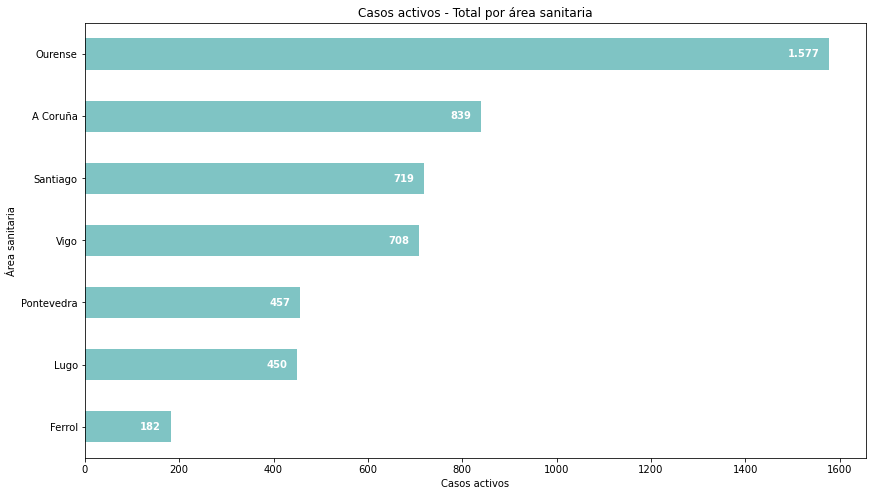

In [14]:
df_cift[['Area_Sanitaria','Pacientes_Sin_Alta']].sort_values('Pacientes_Sin_Alta').plot(kind='barh', 
                                                                                        x='Area_Sanitaria', 
                                                                                        legend=False, 
                                                                                        figsize=(14,8), 
                                                                                        color='darkcyan', 
                                                                                        alpha=0.5)

plt.title('Casos activos - Total por área sanitaria')
plt.xlabel('Casos activos')
plt.ylabel('Área sanitaria')

values = list(df_cift[['Pacientes_Sin_Alta']].sort_values('Pacientes_Sin_Alta')['Pacientes_Sin_Alta'])
for i,val in enumerate(values):
    label = format(int(val), ',').replace(',','.')
    plt.annotate(label,                 
                 xy=(val-20,i),       
                 color='white',         
                 fontweight='semibold', 
                 ha='right',            
                 va='center'             
                )
  
plt.savefig(datefile+'_casos_activos_total.png')    
    
plt.show()

## 3.2. Casos activos - Porcentaje por área sanitaria

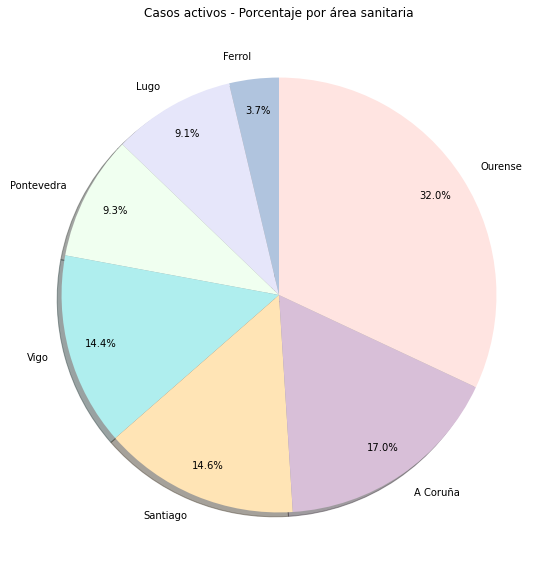

In [15]:
colors=['lightsteelblue','lavender','honeydew','paleturquoise','moccasin','thistle','mistyrose']
df_percnt = df_cift[['Area_Sanitaria','Pacientes_Sin_Alta']].sort_values('Pacientes_Sin_Alta')
df_percnt[['Pacientes_Sin_Alta']].plot(kind='pie',labels=df_percnt['Area_Sanitaria'],subplots=True,
                                       figsize=(10,10),shadow=True,startangle=90,pctdistance=0.85,
                                       autopct='%1.1f%%',colors=colors,legend=False)

plt.title('Casos activos - Porcentaje por área sanitaria')
plt.ylabel(None)

plt.savefig(datefile+'_casos_activos_porcentaje.png') 
plt.show()

## 3.3. Casos activos por 100.000 habitantes

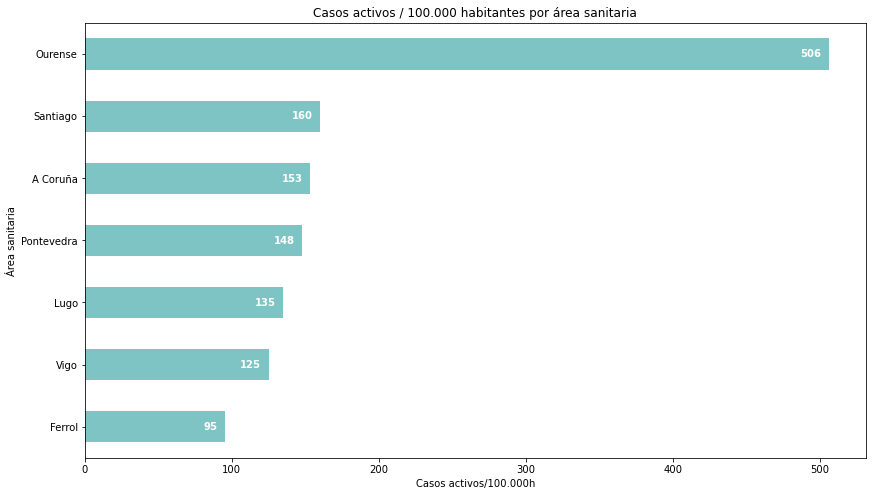

In [16]:
df = pd.merge(how='inner', 
                  left=df_cift, 
                  right=df_areas, 
                  left_on='Area_Sanitaria', 
                  right_on='Area sanitaria')
df['100.000h'] = round((df['Pacientes_Sin_Alta']*100000)/df['Habitantes'])

df = df.sort_values('100.000h')
df.plot(kind='barh', x='Area_Sanitaria', y='100.000h', legend=False, figsize=(14,8), color='darkcyan', alpha=0.5)

plt.title('Casos activos / 100.000 habitantes por área sanitaria')
plt.xlabel('Casos activos/100.000h')
plt.ylabel('Área sanitaria')

for i,val in enumerate(df['100.000h']):
     label = format(int(val), ',').replace(',','.')
     plt.annotate(label,                 
                  xy=(val-5,i),       
                  color='white',         
                  fontweight='semibold', 
                  ha='right',            
                  va='center'             
                 )
plt.savefig(datefile+'_casos_activos_100000h.png')    
    
plt.show()

## 3.4. Positivos

### 3.4.1. Evolución de positivos diarios

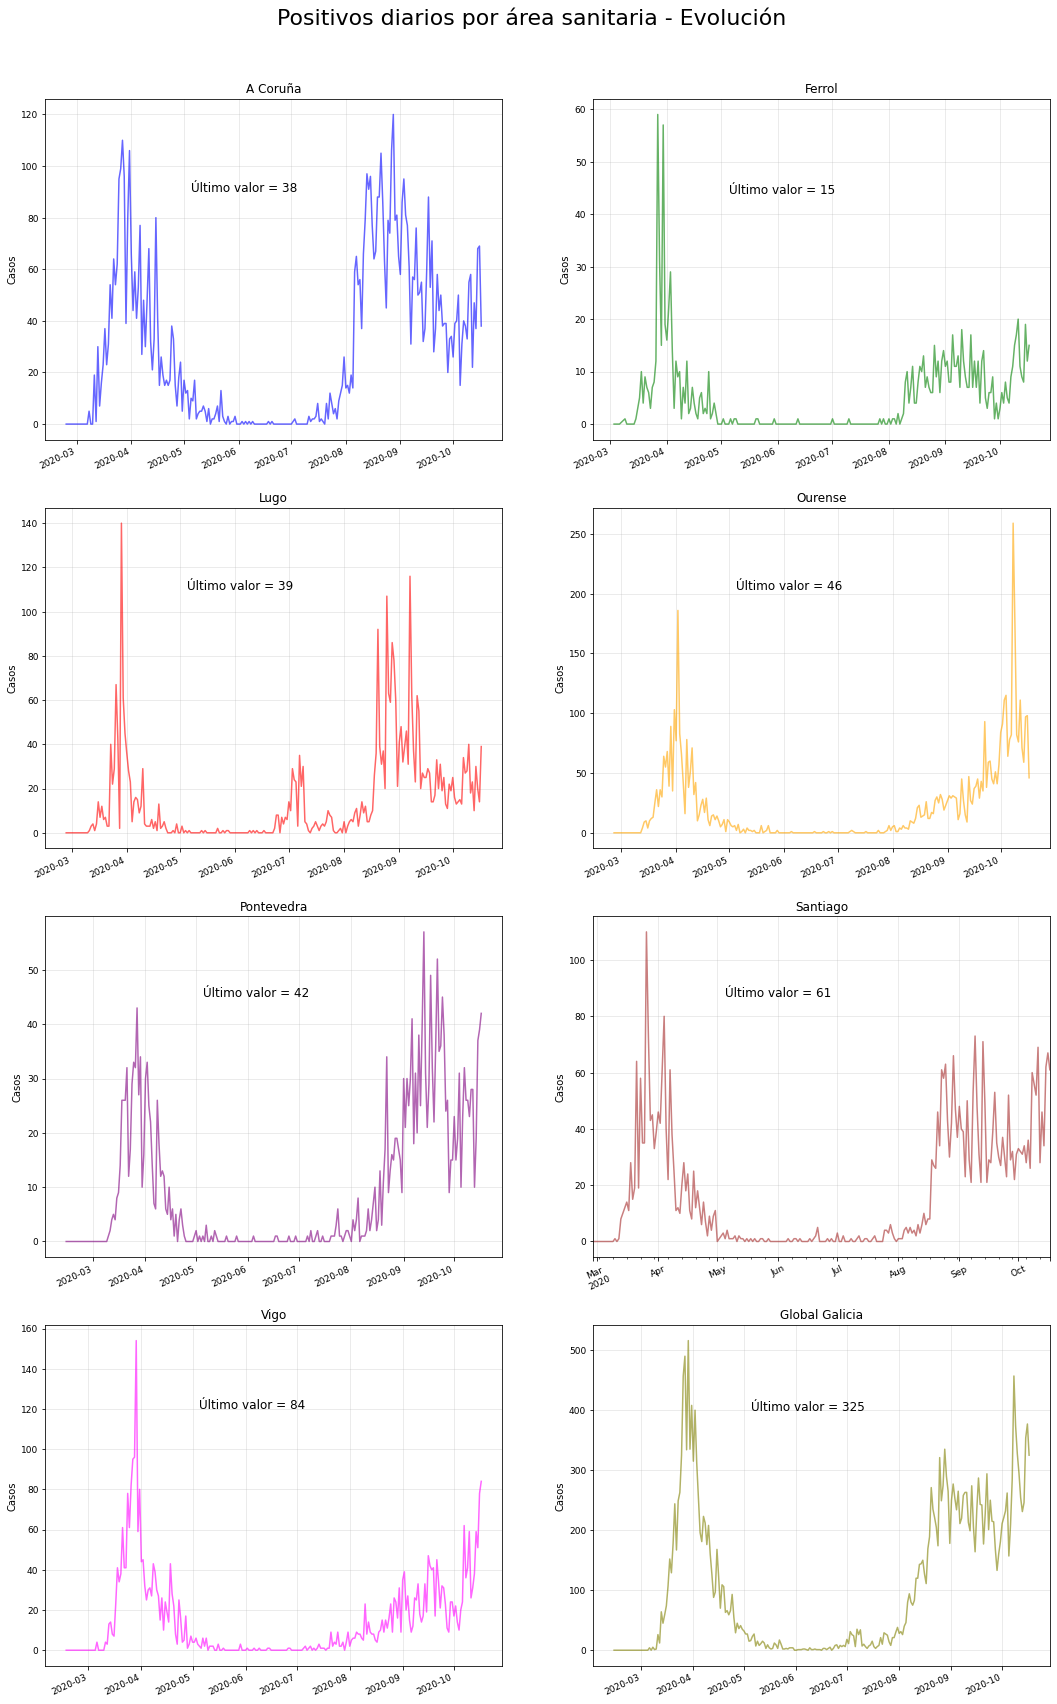

In [17]:
fig = plt.figure()
fig.suptitle('Positivos diarios por área sanitaria - Evolución', fontsize=22, y=0.92)
ax0 = fig.add_subplot(4,2,1)
ax1 = fig.add_subplot(4,2,2)
ax2 = fig.add_subplot(4,2,3)
ax3 = fig.add_subplot(4,2,4)
ax4 = fig.add_subplot(4,2,5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)
ax7 = fig.add_subplot(4,2,8)

#A Coruña
df_coruna.plot(kind='line',x='Fecha',y='Positivos',rot=25,fontsize=9,color='blue',alpha=0.6,
               figsize=(18,32),grid=True,legend=False,ax=ax0)
text_print = 'Último valor = ' + str(df_coruna['Positivos'].iloc[-1])
ax0.text('2020-05-05',90,text_print,color='black',size=12)
ax0.grid(alpha=0.3)
ax0.set_title('A Coruña')
ax0.set_xlabel(None)
ax0.set_ylabel('Casos')

#Ferrol
df_ferrol.plot(kind='line',x='Fecha',y='Positivos',rot=25,fontsize=9,color='green',alpha=0.6,
               legend=False,grid=True,ax=ax1)
text_print = 'Último valor = ' + str(df_ferrol['Positivos'].iloc[-1])
ax1.text('2020-05-05',44,text_print,color='black',size=12)
ax1.grid(alpha=0.3)
ax1.set_title('Ferrol')
ax1.set_xlabel(None)
ax1.set_ylabel('Casos')

#Lugo
df_lugo.plot(kind='line',x='Fecha',y='Positivos',rot=25,fontsize=9,color='red',alpha=0.6,
             legend=False,grid=True,ax=ax2)
text_print = 'Último valor = ' + str(df_lugo['Positivos'].iloc[-1])
ax2.text('2020-05-05',110,text_print,color='black',size=12)
ax2.grid(alpha=0.3)
ax2.set_title('Lugo')
ax2.set_xlabel(None)
ax2.set_ylabel('Casos')

#Ourense
df_ourense.plot(kind='line',x='Fecha',y='Positivos',rot=25,fontsize=9,color='orange',alpha=0.6,
                legend=False,grid=True,ax=ax3)
text_print = 'Último valor = ' + str(df_ourense['Positivos'].iloc[-1])
ax3.text('2020-05-05',203,text_print,color='black',size=12)
ax3.grid(alpha=0.3)
ax3.set_title('Ourense')
ax3.set_xlabel(None)
ax3.set_ylabel('Casos')

#Pontevedra
df_pontevedra.plot(kind='line',x='Fecha',y='Positivos',rot=25,fontsize=9,color='purple',alpha=0.6,
                   legend=False,grid=True,ax=ax4)
text_print = 'Último valor = ' + str(df_pontevedra['Positivos'].iloc[-1])
ax4.text('2020-05-05',45,text_print,color='black',size=12)
ax4.grid(alpha=0.3)
ax4.set_title('Pontevedra')
ax4.set_xlabel(None)
ax4.set_ylabel('Casos')

#Santiago
df_santiago.plot(kind='line',x='Fecha',y='Positivos',rot=25,fontsize=9,color='brown',alpha=0.6,
                 legend=False,grid=True,ax=ax5)
text_print = 'Último valor = ' + str(df_santiago['Positivos'].iloc[-1])
ax5.text('2020-05-05',87,text_print,color='black',size=12)
ax5.grid(alpha=0.3)
ax5.set_title('Santiago')
ax5.set_xlabel(None)
ax5.set_ylabel('Casos')

#Vigo
df_vigo.plot(kind='line',x='Fecha',y='Positivos',rot=25,fontsize=9,color='magenta',alpha=0.6,
             legend=False,grid=True,ax=ax6)
text_print = 'Último valor = ' + str(df_vigo['Positivos'].iloc[-1])
ax6.text('2020-05-05',120,text_print,color='black',size=12)
ax6.grid(alpha=0.3)
ax6.set_title('Vigo')
ax6.set_xlabel(None)
ax6.set_ylabel('Casos')

#Galicia
df_galicia.plot(kind='line',x='Fecha',y='Positivos',rot=25,fontsize=9,color='olive',alpha=0.6,
                legend=False,grid=True,ax=ax7)
text_print = 'Último valor = ' + str(df_galicia['Positivos'].iloc[-1])
ax7.text('2020-05-05',400,text_print,color='black',size=12)
ax7.grid(alpha=0.3)
ax7.set_title('Global Galicia')
ax7.set_xlabel(None)
ax7.set_ylabel('Casos')

plt.savefig(datefile+'_positivos_diarios.png', dpi=90)

plt.show()

### 3.4.2. Evolución positivos acumulados últimos 7 días

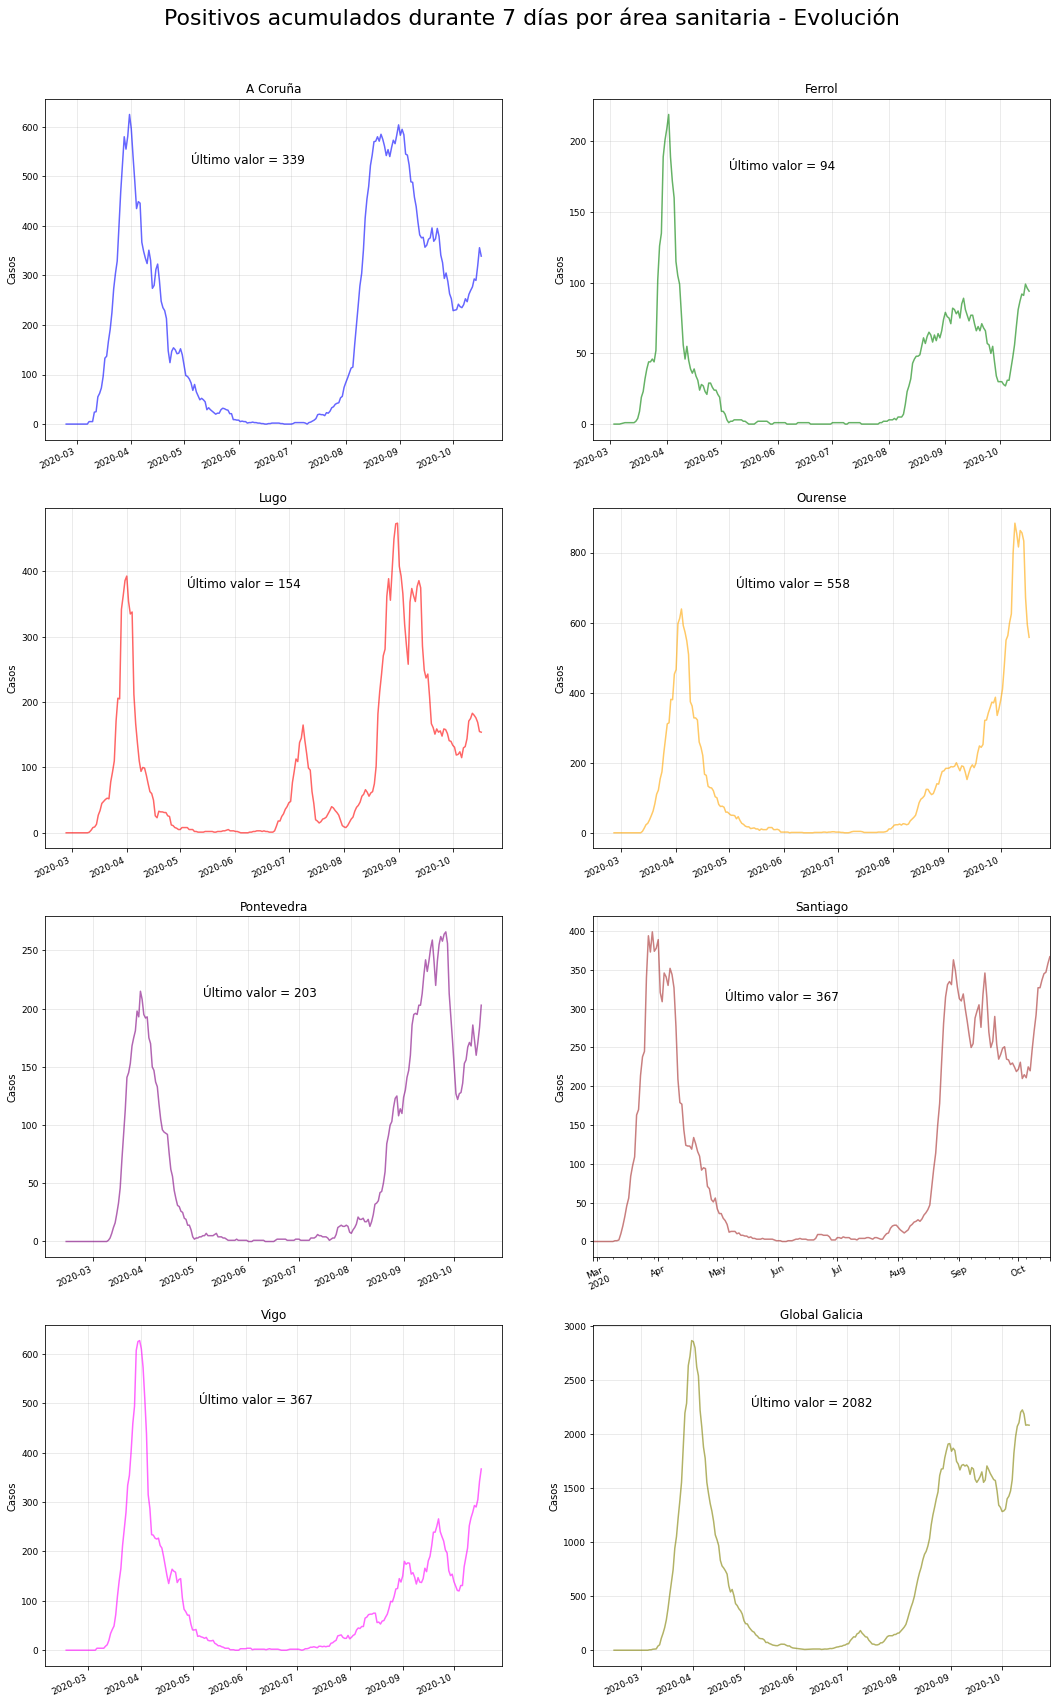

In [18]:
fig = plt.figure()
fig.suptitle('Positivos acumulados durante 7 días por área sanitaria - Evolución', fontsize=22, y=0.92)
ax0 = fig.add_subplot(4,2,1)
ax1 = fig.add_subplot(4,2,2)
ax2 = fig.add_subplot(4,2,3)
ax3 = fig.add_subplot(4,2,4)
ax4 = fig.add_subplot(4,2,5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)
ax7 = fig.add_subplot(4,2,8)

#A Coruña
df_coruna.plot(kind='line',x='Fecha',y='Positivos_7',rot=25,fontsize=9,color='blue',alpha=0.6,
               figsize=(18,32),grid=True,legend=False,ax=ax0)
text_print = 'Último valor = ' + str(df_coruna['Positivos_7'].iloc[-1])
ax0.text('2020-05-05',525,text_print,color='black',size=12)
ax0.grid(alpha=0.3)
ax0.set_title('A Coruña')
ax0.set_xlabel(None)
ax0.set_ylabel('Casos')

#Ferrol
df_ferrol.plot(kind='line',x='Fecha',y='Positivos_7',rot=25,fontsize=9,color='green',alpha=0.6,
               legend=False,grid=True,ax=ax1)
text_print = 'Último valor = ' + str(df_ferrol['Positivos_7'].iloc[-1])
ax1.text('2020-05-05',180,text_print,color='black',size=12)
ax1.grid(alpha=0.3)
ax1.set_title('Ferrol')
ax1.set_xlabel(None)
ax1.set_ylabel('Casos')

#Lugo
df_lugo.plot(kind='line',x='Fecha',y='Positivos_7',rot=25,fontsize=9,color='red',alpha=0.6,
             legend=False,grid=True,ax=ax2)
text_print = 'Último valor = ' + str(df_lugo['Positivos_7'].iloc[-1])
ax2.text('2020-05-05',375,text_print,color='black',size=12)
ax2.grid(alpha=0.3)
ax2.set_title('Lugo')
ax2.set_xlabel(None)
ax2.set_ylabel('Casos')

#Ourense
df_ourense.plot(kind='line',x='Fecha',y='Positivos_7',rot=25,fontsize=9,color='orange',alpha=0.6,
                legend=False,grid=True,ax=ax3)
text_print = 'Último valor = ' + str(df_ourense['Positivos_7'].iloc[-1])
ax3.text('2020-05-05',700,text_print,color='black',size=12)
ax3.grid(alpha=0.3)
ax3.set_title('Ourense')
ax3.set_xlabel(None)
ax3.set_ylabel('Casos')

#Pontevedra
df_pontevedra.plot(kind='line',x='Fecha',y='Positivos_7',rot=25,fontsize=9,color='purple',alpha=0.6,
                   legend=False,grid=True,ax=ax4)
text_print = 'Último valor = ' + str(df_pontevedra['Positivos_7'].iloc[-1])
ax4.text('2020-05-05',210,text_print,color='black',size=12)
ax4.grid(alpha=0.3)
ax4.set_title('Pontevedra')
ax4.set_xlabel(None)
ax4.set_ylabel('Casos')

#Santiago
df_santiago.plot(kind='line',x='Fecha',y='Positivos_7',rot=25,fontsize=9,color='brown',alpha=0.6,
                 legend=False,grid=True,ax=ax5)
text_print = 'Último valor = ' + str(df_santiago['Positivos_7'].iloc[-1])
ax5.text('2020-05-05',310,text_print,color='black',size=12)
ax5.grid(alpha=0.3)
ax5.set_title('Santiago')
ax5.set_xlabel(None)
ax5.set_ylabel('Casos')

#Vigo
df_vigo.plot(kind='line',x='Fecha',y='Positivos_7',rot=25,fontsize=9,color='magenta',alpha=0.6,
             legend=False,grid=True,ax=ax6)
text_print = 'Último valor = ' + str(df_vigo['Positivos_7'].iloc[-1])
ax6.text('2020-05-05',500,text_print,color='black',size=12)
ax6.grid(alpha=0.3)
ax6.set_title('Vigo')
ax6.set_xlabel(None)
ax6.set_ylabel('Casos')

#Galicia
df_galicia.plot(kind='line',x='Fecha',y='Positivos_7',rot=25,fontsize=9,color='olive',alpha=0.6,
                legend=False,grid=True,ax=ax7)
text_print = 'Último valor = ' + str(df_galicia['Positivos_7'].iloc[-1])
ax7.text('2020-05-05',2250,text_print,color='black',size=12)
ax7.grid(alpha=0.3)
ax7.set_title('Global Galicia')
ax7.set_xlabel(None)
ax7.set_ylabel('Casos')

plt.savefig(datefile+'_positivos_7dias.png', dpi=90)

plt.show()

### 3.4.3. Evolución positivos acumulados últimos 14 días

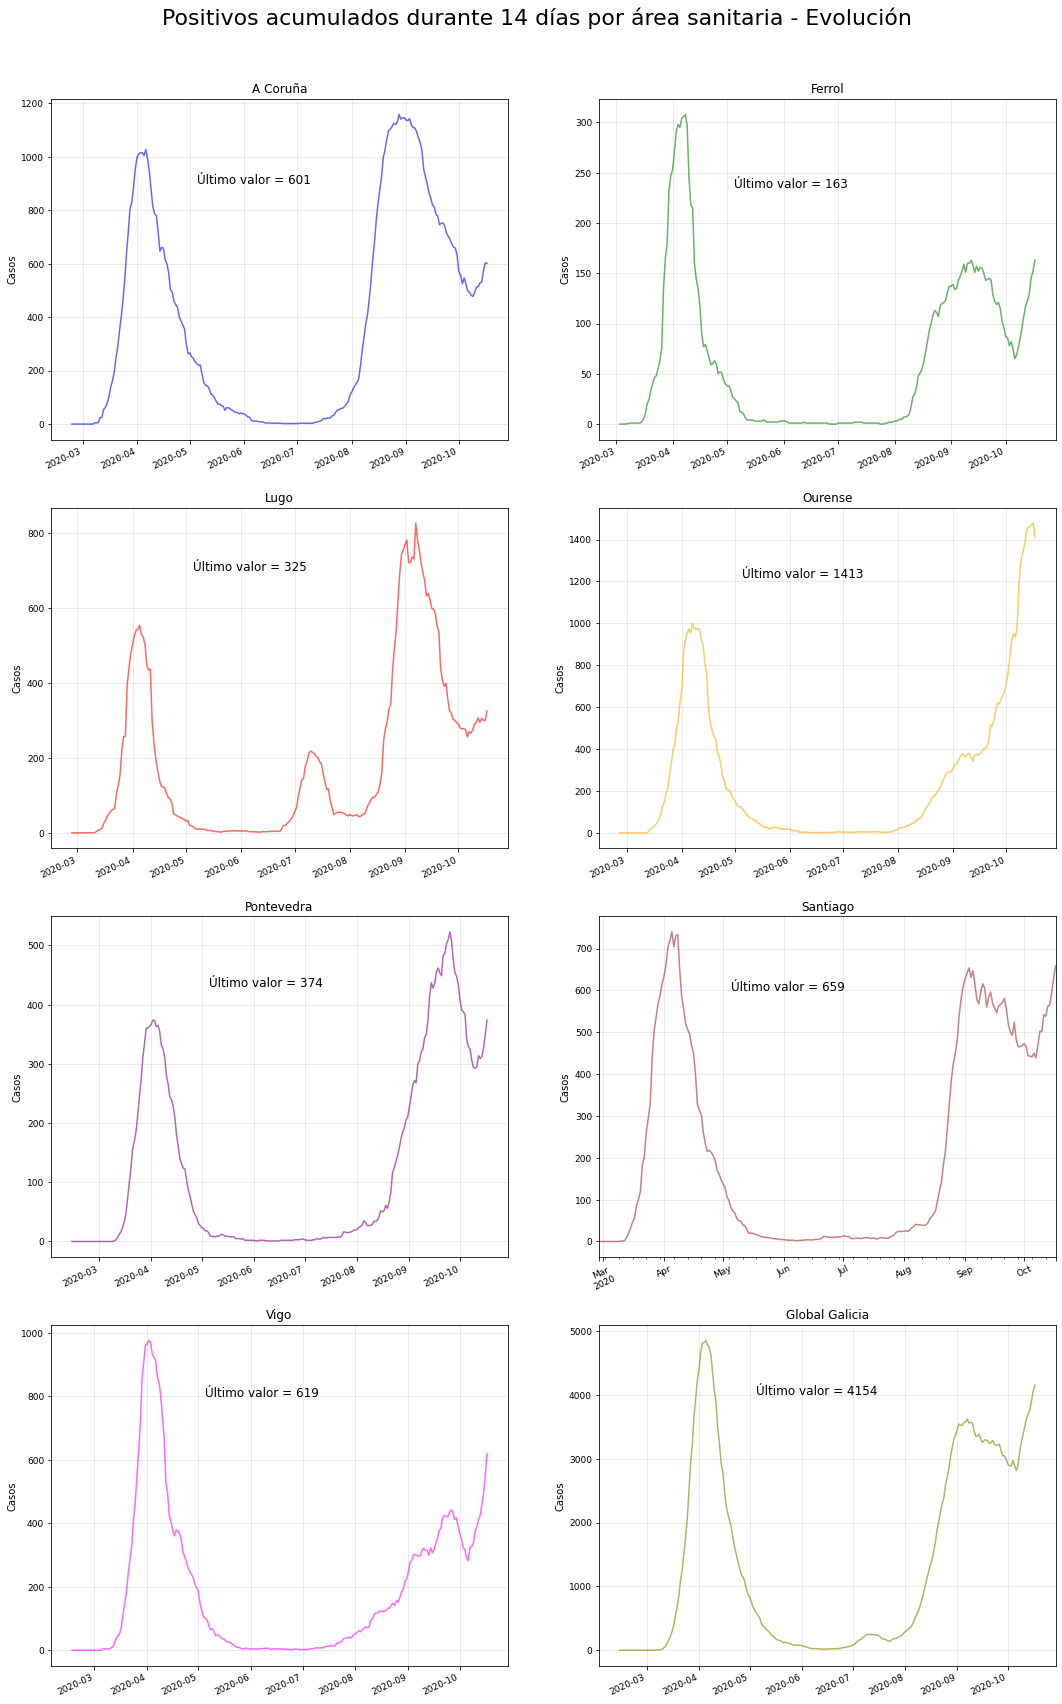

In [19]:
fig = plt.figure()
fig.suptitle('Positivos acumulados durante 14 días por área sanitaria - Evolución', fontsize=22, y=0.92)
ax0 = fig.add_subplot(4,2,1)
ax1 = fig.add_subplot(4,2,2)
ax2 = fig.add_subplot(4,2,3)
ax3 = fig.add_subplot(4,2,4)
ax4 = fig.add_subplot(4,2,5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)
ax7 = fig.add_subplot(4,2,8)

#A Coruña
df_coruna.plot(kind='line',x='Fecha',y='Positivos_14',rot=25,fontsize=9,color='blue',alpha=0.6,
               figsize=(18,32),grid=True,legend=False,ax=ax0)
text_print = 'Último valor = ' + str(df_coruna['Positivos_14'].iloc[-1])
ax0.text('2020-05-05',900,text_print,color='black',size=12)
ax0.grid(alpha=0.3)
ax0.set_title('A Coruña')
ax0.set_xlabel(None)
ax0.set_ylabel('Casos')

#Ferrol
df_ferrol.plot(kind='line',x='Fecha',y='Positivos_14',rot=25,fontsize=9,color='green',alpha=0.6,
               legend=False,grid=True,ax=ax1)
text_print = 'Último valor = ' + str(df_ferrol['Positivos_14'].iloc[-1])
ax1.text('2020-05-05',235,text_print,color='black',size=12)
ax1.grid(alpha=0.3)
ax1.set_title('Ferrol')
ax1.set_xlabel(None)
ax1.set_ylabel('Casos')

#Lugo
df_lugo.plot(kind='line',x='Fecha',y='Positivos_14',rot=25,fontsize=9,color='red',alpha=0.6,
             legend=False,grid=True,ax=ax2)
text_print = 'Último valor = ' + str(df_lugo['Positivos_14'].iloc[-1])
ax2.text('2020-05-05',700,text_print,color='black',size=12)
ax2.grid(alpha=0.3)
ax2.set_title('Lugo')
ax2.set_xlabel(None)
ax2.set_ylabel('Casos')

#Ourense
df_ourense.plot(kind='line',x='Fecha',y='Positivos_14',rot=25,fontsize=9,color='orange',alpha=0.6,
                legend=False,grid=True,ax=ax3)
text_print = 'Último valor = ' + str(df_ourense['Positivos_14'].iloc[-1])
ax3.text('2020-05-05',1220,text_print,color='black',size=12)
ax3.grid(alpha=0.3)
ax3.set_title('Ourense')
ax3.set_xlabel(None)
ax3.set_ylabel('Casos')

#Pontevedra
df_pontevedra.plot(kind='line',x='Fecha',y='Positivos_14',rot=25,fontsize=9,color='purple',alpha=0.6,
                   legend=False,grid=True,ax=ax4)
text_print = 'Último valor = ' + str(df_pontevedra['Positivos_14'].iloc[-1])
ax4.text('2020-05-05',430,text_print,color='black',size=12)
ax4.grid(alpha=0.3)
ax4.set_title('Pontevedra')
ax4.set_xlabel(None)
ax4.set_ylabel('Casos')

#Santiago
df_santiago.plot(kind='line',x='Fecha',y='Positivos_14',rot=25,fontsize=9,color='brown',alpha=0.6,
                 legend=False,grid=True,ax=ax5)
text_print = 'Último valor = ' + str(df_santiago['Positivos_14'].iloc[-1])
ax5.text('2020-05-05',600,text_print,color='black',size=12)
ax5.grid(alpha=0.3)
ax5.set_title('Santiago')
ax5.set_xlabel(None)
ax5.set_ylabel('Casos')

#Vigo
df_vigo.plot(kind='line',x='Fecha',y='Positivos_14',rot=25,fontsize=9,color='magenta',alpha=0.6,
             legend=False,grid=True,ax=ax6)
text_print = 'Último valor = ' + str(df_vigo['Positivos_14'].iloc[-1])
ax6.text('2020-05-05',800,text_print,color='black',size=12)
ax6.grid(alpha=0.3)
ax6.set_title('Vigo')
ax6.set_xlabel(None)
ax6.set_ylabel('Casos')

#Galicia
df_galicia.plot(kind='line',x='Fecha',y='Positivos_14',rot=25,fontsize=9,color='olive',alpha=0.6,
                legend=False,grid=True,ax=ax7)
text_print = 'Último valor = ' + str(df_galicia['Positivos_14'].iloc[-1])
ax7.text('2020-05-05',4000,text_print,color='black',size=12)
ax7.grid(alpha=0.3)
ax7.set_title('Global Galicia')
ax7.set_xlabel(None)
ax7.set_ylabel('Casos')

plt.savefig(datefile+'_positivos_14dias.png', dpi=90)

plt.show()

## 3.5. PCR

### 3.5.1. Evolución diaria de PCR positivas

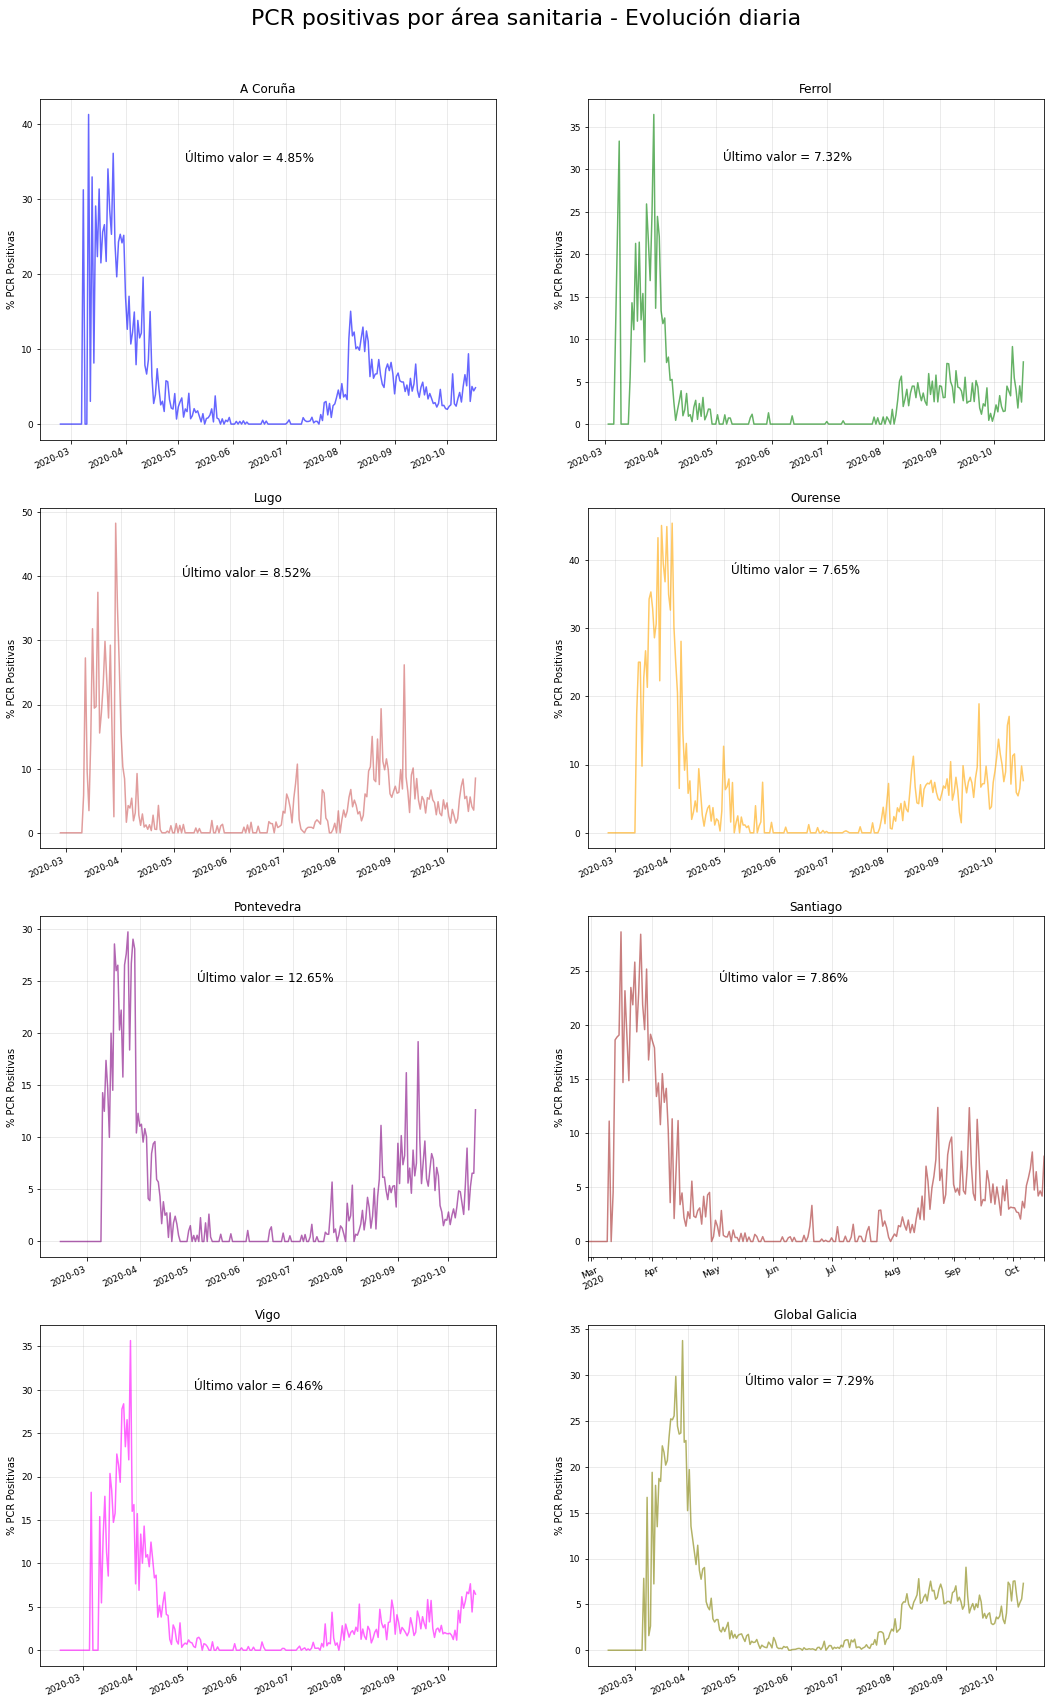

In [20]:
fig = plt.figure()
fig.suptitle('PCR positivas por área sanitaria - Evolución diaria', fontsize=22, y=0.92)
ax0 = fig.add_subplot(4,2,1)
ax1 = fig.add_subplot(4,2,2)
ax2 = fig.add_subplot(4,2,3)
ax3 = fig.add_subplot(4,2,4)
ax4 = fig.add_subplot(4,2,5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)
ax7 = fig.add_subplot(4,2,8)

#A Coruña
df_coruna.plot(kind='line',x='Fecha',y='%Infecciones',rot=25,fontsize=9,color='blue',alpha=0.6,
               figsize=(18,32),grid=True,legend=False,ax=ax0)
text_print = 'Último valor = ' + str(df_coruna['%Infecciones'].iloc[-1]) + '%'
ax0.text('2020-05-05',35,text_print,color='black',size=12)
ax0.grid(alpha=0.3)
ax0.set_title('A Coruña')
ax0.set_xlabel(None)
ax0.set_ylabel('% PCR Positivas')

#Ferrol
df_ferrol.plot(kind='line',x='Fecha',y='%Infecciones',rot=25,fontsize=9,color='green',alpha=0.6,
               legend=False,grid=True,ax=ax1)
text_print = 'Último valor = ' + str(df_ferrol['%Infecciones'].iloc[-1]) + '%'
ax1.text('2020-05-05',31,text_print,color='black',size=12)
ax1.grid(alpha=0.3)
ax1.set_title('Ferrol')
ax1.set_xlabel(None)
ax1.set_ylabel('% PCR Positivas')

#Lugo
df_lugo.plot(kind='line',x='Fecha',y='%Infecciones',rot=25,fontsize=9,color='indianred',alpha=0.6,
             legend=False,grid=True,ax=ax2)
text_print = 'Último valor = ' + str(df_lugo['%Infecciones'].iloc[-1]) + '%'
ax2.text('2020-05-05',40,text_print,color='black',size=12)
ax2.grid(alpha=0.3)
ax2.set_title('Lugo')
ax2.set_xlabel(None)
ax2.set_ylabel('% PCR Positivas')

#Ourense
df_ourense.plot(kind='line',x='Fecha',y='%Infecciones',rot=25,fontsize=9,color='orange',alpha=0.6,
                legend=False,grid=True,ax=ax3)
text_print = 'Último valor = ' + str(df_ourense['%Infecciones'].iloc[-1]) + '%'
ax3.text('2020-05-05',38,text_print,color='black',size=12)
ax3.grid(alpha=0.3)
ax3.set_title('Ourense')
ax3.set_xlabel(None)
ax3.set_ylabel('% PCR Positivas')

#Pontevedra
df_pontevedra.plot(kind='line',x='Fecha',y='%Infecciones',rot=25,fontsize=9,color='purple',alpha=0.6,
                   legend=False,grid=True,ax=ax4)
text_print = 'Último valor = ' + str(df_pontevedra['%Infecciones'].iloc[-1]) + '%'
ax4.text('2020-05-05',25,text_print,color='black',size=12)
ax4.grid(alpha=0.3)
ax4.set_title('Pontevedra')
ax4.set_xlabel(None)
ax4.set_ylabel('% PCR Positivas')

#Santiago
df_santiago.plot(kind='line',x='Fecha',y='%Infecciones',rot=25,fontsize=9,color='brown',alpha=0.6,
                 legend=False,grid=True,ax=ax5)
text_print = 'Último valor = ' + str(df_santiago['%Infecciones'].iloc[-1]) + '%'
ax5.text('2020-05-05',24,text_print,color='black',size=12)
ax5.grid(alpha=0.3)
ax5.set_title('Santiago')
ax5.set_xlabel(None)
ax5.set_ylabel('% PCR Positivas')

#Vigo
df_vigo.plot(kind='line',x='Fecha',y='%Infecciones',rot=25,fontsize=9,color='magenta',alpha=0.6,
             legend=False,grid=True,ax=ax6)
text_print = 'Último valor = ' + str(df_vigo['%Infecciones'].iloc[-1]) + '%'
ax6.text('2020-05-05',30,text_print,color='black',size=12)
ax6.grid(alpha=0.3)
ax6.set_title('Vigo')
ax6.set_xlabel(None)
ax6.set_ylabel('% PCR Positivas')

#Galicia
df_galicia.plot(kind='line',x='Fecha',y='%Infecciones',rot=25,fontsize=9,color='olive',alpha=0.6,
                legend=False,grid=True,ax=ax7)
text_print = 'Último valor = ' + str(df_galicia['%Infecciones'].iloc[-1]) + '%'
ax7.text('2020-05-05',29,text_print,color='black',size=12)
ax7.grid(alpha=0.3)
ax7.set_title('Global Galicia')
ax7.set_xlabel(None)
ax7.set_ylabel('% PCR Positivas')

plt.savefig(datefile+'_PCR_positivas_por_area.png', dpi=90)

plt.show()

### 3.5.2. Evolución PCR positivas - 7 días

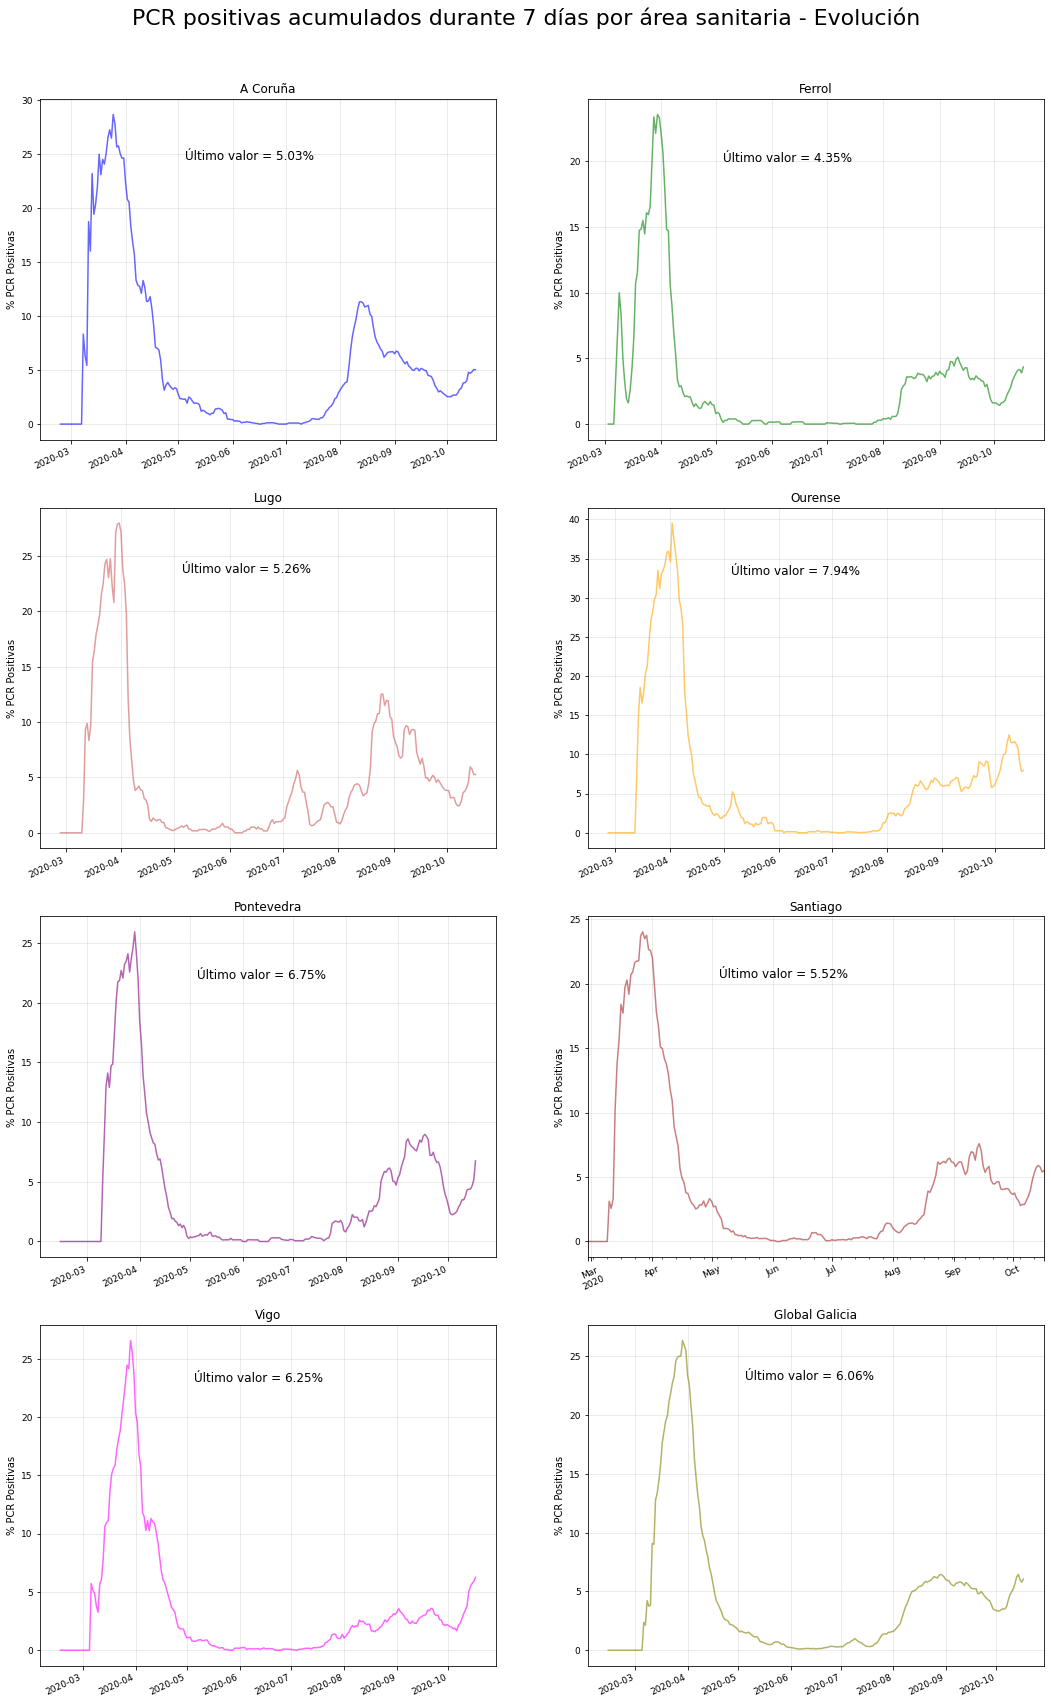

In [21]:
fig = plt.figure()
fig.suptitle('PCR positivas acumulados durante 7 días por área sanitaria - Evolución', fontsize=22, y=0.92)
ax0 = fig.add_subplot(4,2,1)
ax1 = fig.add_subplot(4,2,2)
ax2 = fig.add_subplot(4,2,3)
ax3 = fig.add_subplot(4,2,4)
ax4 = fig.add_subplot(4,2,5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)
ax7 = fig.add_subplot(4,2,8)

#A Coruña
df_coruna.plot(kind='line',x='Fecha',y='%Inf_7',rot=25,fontsize=9,color='blue',alpha=0.6,
               figsize=(18,32),grid=True,legend=False,ax=ax0)
text_print = 'Último valor = ' + "{:.2f}".format(df_coruna['%Inf_7'].iloc[-1]) + '%'
ax0.text('2020-05-05',24.5,text_print,color='black',size=12)
ax0.grid(alpha=0.3)
ax0.set_title('A Coruña')
ax0.set_xlabel(None)
ax0.set_ylabel('% PCR Positivas')

#Ferrol
df_ferrol.plot(kind='line',x='Fecha',y='%Inf_7',rot=25,fontsize=9,color='green',alpha=0.6,
               legend=False,grid=True,ax=ax1)
text_print = 'Último valor = ' + "{:.2f}".format(df_ferrol['%Inf_7'].iloc[-1]) + '%'
ax1.text('2020-05-05',20,text_print,color='black',size=12)
ax1.grid(alpha=0.3)
ax1.set_title('Ferrol')
ax1.set_xlabel(None)
ax1.set_ylabel('% PCR Positivas')

#Lugo
df_lugo.plot(kind='line',x='Fecha',y='%Inf_7',rot=25,fontsize=9,color='indianred',alpha=0.6,
             legend=False,grid=True,ax=ax2)
text_print = 'Último valor = ' + "{:.2f}".format(df_lugo['%Inf_7'].iloc[-1]) + '%'
ax2.text('2020-05-05',23.5,text_print,color='black',size=12)
ax2.grid(alpha=0.3)
ax2.set_title('Lugo')
ax2.set_xlabel(None)
ax2.set_ylabel('% PCR Positivas')

#Ourense
df_ourense.plot(kind='line',x='Fecha',y='%Inf_7',rot=25,fontsize=9,color='orange',alpha=0.6,
                legend=False,grid=True,ax=ax3)
text_print = 'Último valor = ' + "{:.2f}".format(df_ourense['%Inf_7'].iloc[-1]) + '%'
ax3.text('2020-05-05',33,text_print,color='black',size=12)
ax3.grid(alpha=0.3)
ax3.set_title('Ourense')
ax3.set_xlabel(None)
ax3.set_ylabel('% PCR Positivas')

#Pontevedra
df_pontevedra.plot(kind='line',x='Fecha',y='%Inf_7',rot=25,fontsize=9,color='purple',alpha=0.6,
                   legend=False,grid=True,ax=ax4)
text_print = 'Último valor = ' + "{:.2f}".format(df_pontevedra['%Inf_7'].iloc[-1]) + '%'
ax4.text('2020-05-05',22,text_print,color='black',size=12)
ax4.grid(alpha=0.3)
ax4.set_title('Pontevedra')
ax4.set_xlabel(None)
ax4.set_ylabel('% PCR Positivas')

#Santiago
df_santiago.plot(kind='line',x='Fecha',y='%Inf_7',rot=25,fontsize=9,color='brown',alpha=0.6,
                 legend=False,grid=True,ax=ax5)
text_print = 'Último valor = ' + "{:.2f}".format(df_santiago['%Inf_7'].iloc[-1]) + '%'
ax5.text('2020-05-05',20.5,text_print,color='black',size=12)
ax5.grid(alpha=0.3)
ax5.set_title('Santiago')
ax5.set_xlabel(None)
ax5.set_ylabel('% PCR Positivas')

#Vigo
df_vigo.plot(kind='line',x='Fecha',y='%Inf_7',rot=25,fontsize=9,color='magenta',alpha=0.6,
             legend=False,grid=True,ax=ax6)
text_print = 'Último valor = ' + "{:.2f}".format(df_vigo['%Inf_7'].iloc[-1]) + '%'
ax6.text('2020-05-05',23,text_print,color='black',size=12)
ax6.grid(alpha=0.3)
ax6.set_title('Vigo')
ax6.set_xlabel(None)
ax6.set_ylabel('% PCR Positivas')

#Galicia
df_galicia.plot(kind='line',x='Fecha',y='%Inf_7',rot=25,fontsize=9,color='olive',alpha=0.6,
                legend=False,grid=True,ax=ax7)
text_print = 'Último valor = ' + "{:.2f}".format(df_galicia['%Inf_7'].iloc[-1]) + '%'
ax7.text('2020-05-05',23,text_print,color='black',size=12)
ax7.grid(alpha=0.3)
ax7.set_title('Global Galicia')
ax7.set_xlabel(None)
ax7.set_ylabel('% PCR Positivas')

plt.savefig(datefile+'_PCR_positivas_7dias_por_area.png', dpi=90)

plt.show()

### 3.5.3. Evolución PCR positivas - 14 días

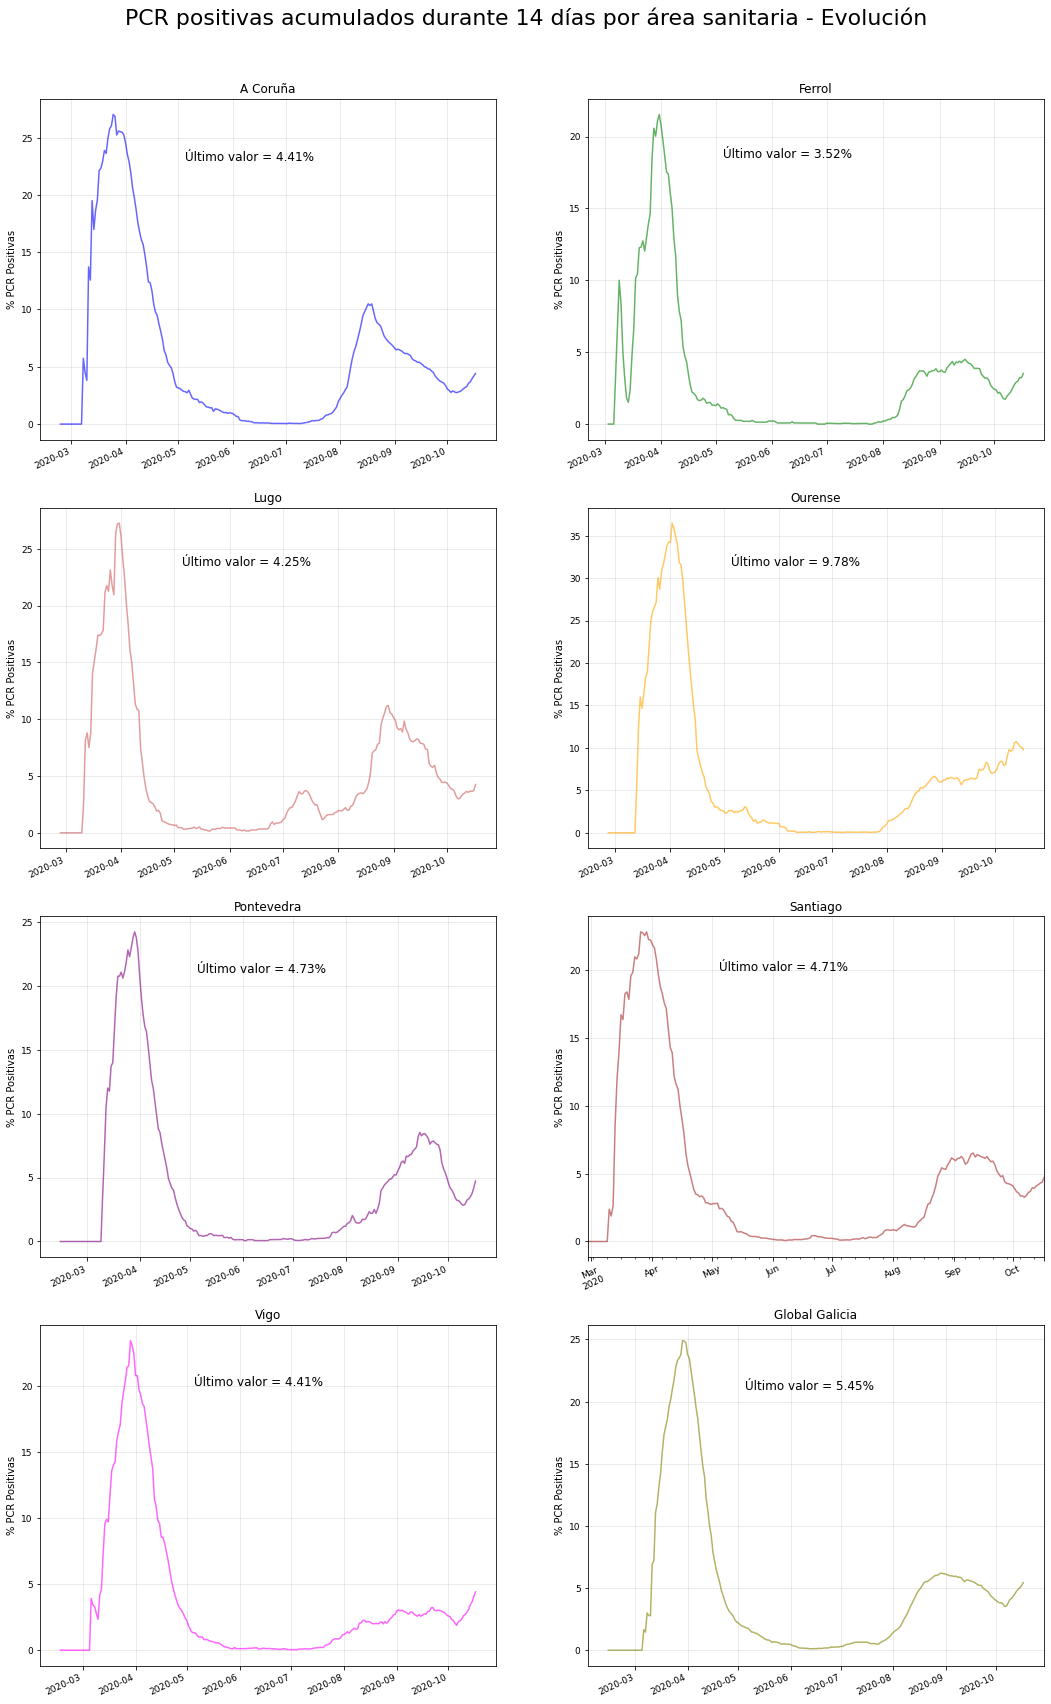

In [22]:
fig = plt.figure()
fig.suptitle('PCR positivas acumulados durante 14 días por área sanitaria - Evolución', fontsize=22, y=0.92)
ax0 = fig.add_subplot(4,2,1)
ax1 = fig.add_subplot(4,2,2)
ax2 = fig.add_subplot(4,2,3)
ax3 = fig.add_subplot(4,2,4)
ax4 = fig.add_subplot(4,2,5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)
ax7 = fig.add_subplot(4,2,8)

#A Coruña
df_coruna.plot(kind='line',x='Fecha',y='%Inf_14',rot=25,fontsize=9,color='blue',alpha=0.6,
               figsize=(18,32),grid=True,legend=False,ax=ax0)
text_print = 'Último valor = ' + "{:.2f}".format(df_coruna['%Inf_14'].iloc[-1]) + '%'
ax0.text('2020-05-05',23,text_print,color='black',size=12)
ax0.grid(alpha=0.3)
ax0.set_title('A Coruña')
ax0.set_xlabel(None)
ax0.set_ylabel('% PCR Positivas')

#Ferrol
df_ferrol.plot(kind='line',x='Fecha',y='%Inf_14',rot=25,fontsize=9,color='green',alpha=0.6,
               legend=False,grid=True,ax=ax1)
text_print = 'Último valor = ' + "{:.2f}".format(df_ferrol['%Inf_14'].iloc[-1]) + '%'
ax1.text('2020-05-05',18.5,text_print,color='black',size=12)
ax1.grid(alpha=0.3)
ax1.set_title('Ferrol')
ax1.set_xlabel(None)
ax1.set_ylabel('% PCR Positivas')

#Lugo
df_lugo.plot(kind='line',x='Fecha',y='%Inf_14',rot=25,fontsize=9,color='indianred',alpha=0.6,
             legend=False,grid=True,ax=ax2)
text_print = 'Último valor = ' + "{:.2f}".format(df_lugo['%Inf_14'].iloc[-1]) + '%'
ax2.text('2020-05-05',23.5,text_print,color='black',size=12)
ax2.grid(alpha=0.3)
ax2.set_title('Lugo')
ax2.set_xlabel(None)
ax2.set_ylabel('% PCR Positivas')

#Ourense
df_ourense.plot(kind='line',x='Fecha',y='%Inf_14',rot=25,fontsize=9,color='orange',alpha=0.6,
                legend=False,grid=True,ax=ax3)
text_print = 'Último valor = ' + "{:.2f}".format(df_ourense['%Inf_14'].iloc[-1]) + '%'
ax3.text('2020-05-05',31.5,text_print,color='black',size=12)
ax3.grid(alpha=0.3)
ax3.set_title('Ourense')
ax3.set_xlabel(None)
ax3.set_ylabel('% PCR Positivas')

#Pontevedra
df_pontevedra.plot(kind='line',x='Fecha',y='%Inf_14',rot=25,fontsize=9,color='purple',alpha=0.6,
                   legend=False,grid=True,ax=ax4)
text_print = 'Último valor = ' + "{:.2f}".format(df_pontevedra['%Inf_14'].iloc[-1]) + '%'
ax4.text('2020-05-05',21,text_print,color='black',size=12)
ax4.grid(alpha=0.3)
ax4.set_title('Pontevedra')
ax4.set_xlabel(None)
ax4.set_ylabel('% PCR Positivas')

#Santiago
df_santiago.plot(kind='line',x='Fecha',y='%Inf_14',rot=25,fontsize=9,color='brown',alpha=0.6,
                 legend=False,grid=True,ax=ax5)
text_print = 'Último valor = ' + "{:.2f}".format(df_santiago['%Inf_14'].iloc[-1]) + '%'
ax5.text('2020-05-05',20,text_print,color='black',size=12)
ax5.grid(alpha=0.3)
ax5.set_title('Santiago')
ax5.set_xlabel(None)
ax5.set_ylabel('% PCR Positivas')

#Vigo
df_vigo.plot(kind='line',x='Fecha',y='%Inf_14',rot=25,fontsize=9,color='magenta',alpha=0.6,
             legend=False,grid=True,ax=ax6)
text_print = 'Último valor = ' + "{:.2f}".format(df_vigo['%Inf_14'].iloc[-1]) + '%'
ax6.text('2020-05-05',20,text_print,color='black',size=12)
ax6.grid(alpha=0.3)
ax6.set_title('Vigo')
ax6.set_xlabel(None)
ax6.set_ylabel('% PCR Positivas')

#Galicia
df_galicia.plot(kind='line',x='Fecha',y='%Inf_14',rot=25,fontsize=9,color='olive',alpha=0.6,
                legend=False,grid=True,ax=ax7)
text_print = 'Último valor = ' + "{:.2f}".format(df_galicia['%Inf_14'].iloc[-1]) + '%'
ax7.text('2020-05-05',21,text_print,color='black',size=12)
ax7.grid(alpha=0.3)
ax7.set_title('Global Galicia')
ax7.set_xlabel(None)
ax7.set_ylabel('% PCR Positivas')

plt.savefig(datefile+'_PCR_positivas_14dias_por_area.png', dpi=90)

plt.show()

## 3.6. Ocupación actual de camas

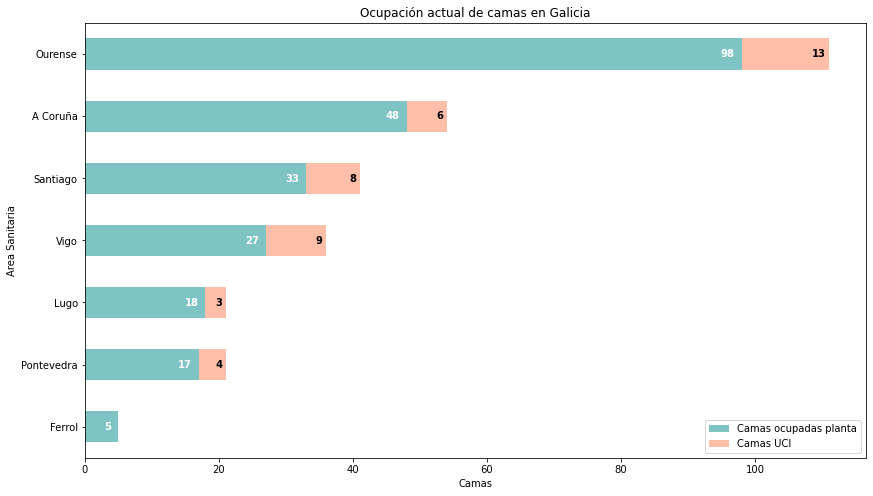

In [23]:
df_cama = df_cama.groupby(['Area_Sanitaria']).sum()
df_cama.sort_values('Camas_Ocupadas_HOS', ascending=True, axis=0, inplace=True)

df_cama.plot(kind='barh',stacked=True,figsize=(14,8),alpha=0.5,color=['darkcyan','coral'])

val_prev = []
for i,val in enumerate(df_cama['Camas_Ocupadas_HOS']):
    label = format(int(val), ',').replace(',','.')
    plt.annotate(label,xy=(val-1,i),color='white',fontweight='semibold',ha='right',va='center')
    val_prev.append(val)
for i,val in enumerate(df_cama['Camas_Ocupadas_UC']):
    if not val==0:
        label = format(int(val), ',').replace(',','.')
        plt.annotate(label,xy=(val_prev[i]+val-0.5,i),color='black',fontweight='semibold',ha='right',va='center')

plt.title('Ocupación actual de camas en Galicia')        
plt.xlabel('Camas')
plt.ylabel('Area Sanitaria')
plt.legend(['Camas ocupadas planta','Camas UCI'])
        
plt.savefig(datefile+'_camas_ocupadas_por_area.png')    
    
plt.show()